In [ ]:
!pip install pulp

import pulp as pl

# 1. Inicializar o problema
prob_est = pl.LpProblem("Fazendeiro_Estocastico", pl.LpMinimize)

# 2. Definir Variáveis de 1º Estágio (Plantio)
x1 = pl.LpVariable("x1_Trigo_ha", lowBound=0)
x2 = pl.LpVariable("x2_Milho_ha", lowBound=0)
x3 = pl.LpVariable("x3_Cana_ha", lowBound=0)

# 3. Definir Variáveis de 2º Estágio (Cenários s=1, s=2, s=3)
cenarios = [1, 2, 3]
y1s = pl.LpVariable.dicts("y1_Trigo_compra", cenarios, lowBound=0)
w1s = pl.LpVariable.dicts("w1_Trigo_venda", cenarios, lowBound=0)
y2s = pl.LpVariable.dicts("y2_Milho_compra", cenarios, lowBound=0)
w2s = pl.LpVariable.dicts("w2_Milho_venda", cenarios, lowBound=0)
w3s = pl.LpVariable.dicts("w3_Cana_venda_quota", cenarios, lowBound=0)
w4s = pl.LpVariable.dicts("w4_Cana_venda_excesso", cenarios, lowBound=0)

# 4. Definir a Função Objetivo (Minimizar Custo Esperado)
# Custos de 1º Estágio
custo_plantio = 150*x1 + 230*x2 + 260*x3
# Receitas Esperadas (2º Estágio)
receita_s1 = 170*w1s[1] - 238*y1s[1] + 150*w2s[1] - 210*y2s[1] + 36*w3s[1] + 10*w4s[1]
receita_s2 = 170*w1s[2] - 238*y1s[2] + 150*w2s[2] - 210*y2s[2] + 36*w3s[2] + 10*w4s[2]
receita_s3 = 170*w1s[3] - 238*y1s[3] + 150*w2s[3] - 210*y2s[3] + 36*w3s[3] + 10*w4s[3]

prob_est += custo_plantio - (1/3)*receita_s1 - (1/3)*receita_s2 - (1/3)*receita_s3, "Custo_Esperado"

# 5. Definir as Restrições
# Restrição de 1º Estágio
prob_est += x1 + x2 + x3 <= 500, "Restricao_Terra"

# Restrições de 2º Estágio (Cenário 1 - Otimista: 3, 3.6, 24)
prob_est += 3*x1 + y1s[1] - w1s[1] >= 200, "Restricao_Trigo_s1"
prob_est += 3.6*x2 + y2s[1] - w2s[1] >= 240, "Restricao_Milho_s1"
prob_est += w3s[1] + w4s[1] <= 24*x3, "Restricao_Cana_s1"
prob_est += w3s[1] <= 6000, "Restricao_Quota_s1"

# Restrições de 2º Estágio (Cenário 2 - Médio: 2.5, 3, 20)
prob_est += 2.5*x1 + y1s[2] - w1s[2] >= 200, "Restricao_Trigo_s2"
prob_est += 3*x2 + y2s[2] - w2s[2] >= 240, "Restricao_Milho_s2"
prob_est += w3s[2] + w4s[2] <= 20*x3, "Restricao_Cana_s2"
prob_est += w3s[2] <= 6000, "Restricao_Quota_s2"

# Restrições de 2º Estágio (Cenário 3 - Pessimista: 2, 2.4, 16)
prob_est += 2*x1 + y1s[3] - w1s[3] >= 200, "Restricao_Trigo_s3"
prob_est += 2.4*x2 + y2s[3] - w2s[3] >= 240, "Restricao_Milho_s3"
prob_est += w3s[3] + w4s[3] <= 16*x3, "Restricao_Cana_s3"
prob_est += w3s[3] <= 6000, "Restricao_Quota_s3"

# 6. Resolver o problema
prob_est.solve()

# 7. Imprimir os resultados
print(f"Status: {pl.LpStatus[prob_est.status]}")
print(f"Custo Esperado Mínimo (Lucro Esperado Máximo): {-prob_est.objective.value():.2f}")
print("--- Decisão de Plantio (Hectares) ---")
print(f"  Trigo (x1): {x1.value():.2f}")
print(f"  Milho (x2): {x2.value():.2f}")
print(f"  Cana (x3): {x3.value():.2f}")
print("--- Ações no Cenário Otimista (s=1) ---")
print(f"  Trigo Comprado: {y1s[1].value():.2f}, Vendido: {w1s[1].value():.2f}")
print(f"  Milho Comprado: {y2s[1].value():.2f}, Vendido: {w2s[1].value():.2f}")
print(f"  Cana Vendida: {w3s[1].value() + w4s[1].value():.2f}")
print("--- Ações no Cenário Médio (s=2) ---")
print(f"  Trigo Comprado: {y1s[2].value():.2f}, Vendido: {w1s[2].value():.2f}")
print(f"  Milho Comprado: {y2s[2].value():.2f}, Vendido: {w2s[2].value():.2f}")
print(f"  Cana Vendida: {w3s[2].value() + w4s[2].value():.2f}")
print("--- Ações no Cenário Pessimista (s=3) ---")
print(f"  Trigo Comprado: {y1s[3].value():.2f}, Vendido: {w1s[3].value():.2f}")
print(f"  Milho Comprado: {y2s[3].value():.2f}, Vendido: {w2s[3].value():.2f}")
print(f"  Cana Vendida: {w3s[3].value() + w4s[3].value():.2f}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 78.3 MB/s eta 0:00:00
Status: Optimal
Custo Esperado Mínimo (Lucro Esperado Máximo): 108390.00
--- Decisão de Plantio (Hectares) ---
  Trigo (x1): 170.00
  Milho (x2): 80.00
  Cana (x3): 250.00
--- Ações no Cenário Otimista (s=1) ---
  Trigo Comprado: 0.00, Vendido: 310.00
  Milho Comprado: 0.00, Vendido: 48.00
  Cana Vendida: 6000.00
--- Ações no Cenário Médio (s=2) ---
  Trigo Comprado: 0.00, Vendido: 225.00
  Milho Comprado: 0.00, Vendido: 0.00
  Cana Vendida: 5000.00
--- Ações no Cenário Pessimista (s=3) ---
  Trigo Comprado: 0.00, Vendido: 140.00
  Milho Comprado: 48.00, Vendido: 0.00
  Cana Vendida: 4000.00


In [ ]:
 import pulp as pl

 # 1. Inicializar o problema
 prob_est = pl.LpProblem("Fazendeiro_Estocastico", pl.LpMinimize)

 # 2. Definir Variveis de 1 Estgio (Plantio)
 x1 = pl.LpVariable("x1_Trigo_ha", lowBound=0)
 x2 = pl.LpVariable("x2_Milho_ha", lowBound=0)
 x3 = pl.LpVariable("x3_Cana_ha", lowBound=0)

 # 3. Definir Variveis de 2 Estgio ( Cenrios s=1, s=2, s=3)
 cenarios = [1, 2, 3]
 y1s = pl.LpVariable.dicts("y1_Trigo_compra", cenarios, lowBound=0)
 w1s = pl.LpVariable.dicts("w1_Trigo_venda", cenarios, lowBound=0)
 y2s = pl.LpVariable.dicts("y2_Milho_compra", cenarios, lowBound=0)
 w2s = pl.LpVariable.dicts("w2_Milho_venda", cenarios, lowBound=0)
 w3s = pl.LpVariable.dicts("w3_Cana_venda_quota", cenarios, lowBound=0)
 w4s = pl.LpVariable.dicts("w4_Cana_venda_excesso", cenarios, lowBound=0)

 # 4. Definir a Funo Objetivo (Minimizar Custo Esperado)
 # Custos de 1 Estgio
 custo_plantio = 150*x1 + 230*x2 + 260*x3
 # Receitas Esperadas (2 Estgio )
 receita_s1 = 170*w1s[1] - 238*y1s[1] + 150*w2s[1] - 210*y2s[1] + 36*w3s[1] + 10*w4s[1]
 receita_s2 = 170*w1s[2] - 238*y1s[2] + 150*w2s[2] - 210*y2s[2] + 36*w3s[2] + 10*w4s[2]
 receita_s3 = 170*w1s[3] - 238*y1s[3] + 150*w2s[3] - 210*y2s[3] + 36*w3s[3] + 10*w4s[3]

 prob_est += custo_plantio - (1/3)*receita_s1 - (1/3)*receita_s2 - (1/3)*receita_s3, "Custo_Esperado"

 # 5. Definir as Restries
 # Restrio de 1 Estgio
 prob_est += x1 + x2 + x3 <= 500, "Restricao_Terra"

 # Restries de 2 Estgio ( Cenrio 1 - Otimista: 3, 3.6, 24)
 prob_est += 3*x1 + y1s[1] - w1s[1] >= 200, "Restricao_Trigo_s1"
 prob_est += 3.6*x2 + y2s[1] - w2s[1] >= 240, "Restricao_Milho_s1"
 prob_est += w3s[1] + w4s[1] <= 24*x3, "Restricao_Cana_s1"
 prob_est += w3s[1] <= 6000, "Restricao_Quota_s1"

 # Restries de 2 Estgio ( Cenrio 2 - Mdio : 2.5, 3, 20)
 prob_est += 2.5*x1 + y1s[2] - w1s[2] >= 200, "Restricao_Trigo_s2"
 prob_est += 3*x2 + y2s[2] - w2s[2] >= 240, "Restricao_Milho_s2"
 prob_est += w3s[2] + w4s[2] <= 20*x3, "Restricao_Cana_s2"
 prob_est += w3s[2] <= 6000, "Restricao_Quota_s2"

 # Restries de 2 Estgio ( Cenrio 3 - Pessimista: 2, 2.4, 16)
 prob_est += 2*x1 + y1s[3] - w1s[3] >= 200, "Restricao_Trigo_s3"
 prob_est += 2.4*x2 + y2s[3] - w2s[3] >= 240, "Restricao_Milho_s3"
 prob_est += w3s[3] + w4s[3] <= 16*x3, "Restricao_Cana_s3"
 prob_est += w3s[3] <= 6000, "Restricao_Quota_s3"

 # 6. Resolver o problema
 prob_est.solve()

 # 7. Imprimir os resultados
 print(f"Status: {pl.LpStatus[prob_est.status]}")
 print(f"Custo Esperado Mnimo (Lucro Esperado Mximo): {-prob_est.objective.value():.2f}")
 print("--- Deciso de Plantio (Hectares) ---")
 print(f" Trigo (x1): {x1.value():.2f}")
 print(f" Milho (x2): {x2.value():.2f}")
 print(f" Cana (x3): {x3.value():.2f}")
 print("--- Aes no Cenrio Otimista (s=1) ---")
 print(f" Trigo Comprado: {y1s[1].value():.2f}, Vendido: {w1s[1].value():.2f}")
 print(f" Milho Comprado: {y2s[1].value():.2f}, Vendido: {w2s[1].value():.2f}")
 print(f" Cana Vendida: {w3s[1].value() + w4s[1].value():.2f}")
 print("--- Aes no Cenrio Mdio (s=2) ---")
 print(f" Trigo Comprado: {y1s[2].value():.2f}, Vendido: {w1s[2].value():.2f}")
 print(f" Milho Comprado: {y2s[2].value():.2f}, Vendido: {w2s[2].value():.2f}")
 print(f" Cana Vendida: {w3s[2].value() + w4s[2].value():.2f}")
 print("--- Aes no Cenrio Pessimista (s=3) ---")
 print(f" Trigo Comprado: {y1s[3].value():.2f}, Vendido: {w1s[3].value():.2f}")
 print(f" Milho Comprado: {y2s[3].value():.2f}, Vendido: {w2s[3].value():.2f}")
 print(f" Cana Vendida: {w3s[3].value() + w4s[3].value():.2f}")

Status: Optimal
Custo Esperado Mnimo (Lucro Esperado Mximo): 108390.00
--- Deciso de Plantio (Hectares) ---
 Trigo (x1): 170.00
 Milho (x2): 80.00
 Cana (x3): 250.00
--- Aes no Cenrio Otimista (s=1) ---
 Trigo Comprado: 0.00, Vendido: 310.00
 Milho Comprado: 0.00, Vendido: 48.00
 Cana Vendida: 6000.00
--- Aes no Cenrio Mdio (s=2) ---
 Trigo Comprado: 0.00, Vendido: 225.00
 Milho Comprado: 0.00, Vendido: 0.00
 Cana Vendida: 5000.00
--- Aes no Cenrio Pessimista (s=3) ---
 Trigo Comprado: 0.00, Vendido: 140.00
 Milho Comprado: 48.00, Vendido: 0.00
 Cana Vendida: 4000.00


In [ ]:
import pulp as pl

# 1. Dados do Problema (Limites Inferiores)
investimentos = {
    1: {"custo": 8, "lucro": {"s1": 17, "s2": 5, "s3": 7}},
    2: {"custo": 12, "lucro": {"s1": 19, "s2": 23, "s3": 9}},
    3: {"custo": 12, "lucro": {"s1": 21, "s2": 20, "s3": 18}},
    4: {"custo": 10, "lucro": {"s1": 14, "s2": 11, "s3": 6}},
    5: {"custo": 18, "lucro": {"s1": 24, "s2": 17, "s3": 24}}
}
K = 50
N = 5
cenarios = ["s1", "s2", "s3"]
items = list(investimentos.keys())

# 2. Inicializar o problema
prob_maxmin = pl.LpProblem("Investimento_MaxMin", pl.LpMaximize)

# 3. Variáveis de Decisão
# x[k] = 1 se o investimento k é escolhido
x = pl.LpVariable.dicts("x", items, cat=pl.LpBinary)
# t = lucro mínimo garantido
t = pl.LpVariable("t_Lucro_Minimo", lowBound=0)

# 4. Função Objetivo
prob_maxmin += t, "Maximizar_Lucro_Minimo"

# 5. Restrições
# Restrição de capital
prob_maxmin += pl.lpSum(investimentos[k]["custo"] * x[k] for k in items) <= K, "Capital"

# Restrições de lucro mínimo (usando o limite inferior l_k^j)
for s in cenarios:
    lucro_cenario = pl.lpSum(investimentos[k]["lucro"][s] * x[k] for k in items)
    prob_maxmin += t <= lucro_cenario, f"Lucro_Minimo_{s}"

# 6. Resolver
prob_maxmin.solve()

# 7. Resultados
print(f"--- Solução MaxMin ---")
print(f"Status: {pl.LpStatus[prob_maxmin.status]}")
print(f"Lucro Mínimo Garantido (t): {t.value():.2f}")
print("Investimentos Escolhidos:")
for k in items:
    if x[k].value() > 0.5:
        print(f"  - Investimento {k}")

--- Solução MaxMin ---
Status: Optimal
Lucro Mínimo Garantido (t): 58.00
Investimentos Escolhidos:
  - Investimento 1
  - Investimento 2
  - Investimento 3
  - Investimento 5


In [ ]:
import pulp as pl

# 1. Dados do Problema (Limites Inferiores e Superiores)
investimentos_regret = {
    1: {"custo": 8, "lucro_min": {"s1": 17, "s2": 5, "s3": 7}, "lucro_max": {"s1": 19, "s2": 7, "s3": 9}},
    2: {"custo": 12, "lucro_min": {"s1": 19, "s2": 23, "s3": 9}, "lucro_max": {"s1": 21, "s2": 25, "s3": 11}},
    3: {"custo": 12, "lucro_min": {"s1": 21, "s2": 20, "s3": 18}, "lucro_max": {"s1": 23, "s2": 22, "s3": 20}},
    4: {"custo": 10, "lucro_min": {"s1": 14, "s2": 11, "s3": 6}, "lucro_max": {"s1": 16, "s2": 13, "s3": 8}},
    5: {"custo": 18, "lucro_min": {"s1": 24, "s2": 17, "s3": 24}, "lucro_max": {"s1": 26, "s2": 19, "s3": 26}}
}
K = 50
N = 5
cenarios = ["s1", "s2", "s3"]
items = list(investimentos_regret.keys())

# --- PASSO 1: Encontrar o Lucro Ótimo O_j para cada cenário (usando lucro_max) ---
O_j = {}
print("Calculando Lucros Ótimos (O_j)...")
for s in cenarios:
    prob_oj = pl.LpProblem(f"Calculo_Oj_{s}", pl.LpMaximize)
    x_oj = pl.LpVariable.dicts(f"x_oj_{s}", items, cat=pl.LpBinary)

    # Objetivo: Maximizar o lucro máximo possível
    prob_oj += pl.lpSum(investimentos_regret[k]["lucro_max"][s] * x_oj[k] for k in items)

    # Restrição de capital
    prob_oj += pl.lpSum(investimentos_regret[k]["custo"] * x_oj[k] for k in items) <= K

    prob_oj.solve()
    O_j[s] = prob_oj.objective.value()
    print(f"  Lucro Ótimo para Cenário {s} (O_{s}): {O_j[s]}")

# --- PASSO 2: Resolver o problema MinMax Regret ---
prob_mmr = pl.LpProblem("Investimento_MinMaxRegret", pl.LpMinimize)

# Variáveis: x (escolha de investimento), t (arrependimento máximo)
x = pl.LpVariable.dicts("x", items, cat=pl.LpBinary)
t = pl.LpVariable("t_Arrependimento_Max", lowBound=0)

# Objetivo: Minimizar o arrependimento máximo
prob_mmr += t, "Minimizar_Arrependimento_Maximo"

# Restrição de capital
prob_mmr += pl.lpSum(investimentos_regret[k]["custo"] * x[k] for k in items) <= K, "Capital"

# Restrições de Arrependimento (t >= O_j - Lucro_minimo(x, j))
for s in cenarios:
    lucro_min_x = pl.lpSum(investimentos_regret[k]["lucro_min"][s] * x[k] for k in items)
    prob_mmr += t >= O_j[s] - lucro_min_x, f"Arrependimento_{s}"

# Resolver
prob_mmr.solve()

# Resultados
print(f"\n--- Solução MinMax Regret ---")
print(f"Status: {pl.LpStatus[prob_mmr.status]}")
print(f"Arrependimento Máximo Mínimo (t): {t.value():.2f}")
print("Investimentos Escolhidos:")
for k in items:
    if x[k].value() > 0.5:
        print(f"  - Investimento {k}")

Calculando Lucros Ótimos (O_j)...
  Lucro Ótimo para Cenário s1 (O_s1): 89.0
  Lucro Ótimo para Cenário s2 (O_s2): 73.0
  Lucro Ótimo para Cenário s3 (O_s3): 66.0

--- Solução MinMax Regret ---
Status: Optimal
Arrependimento Máximo Mínimo (t): 8.00
Investimentos Escolhidos:
  - Investimento 1
  - Investimento 2
  - Investimento 3
  - Investimento 5


In [ ]:
import pulp as pl

# Esta é uma FORMULAÇÃO CONCEITUAL, pois não há dados de grafo.
# Um solver real exigiria um algoritmo de geração de cortes (Benders).

def setup_minmax_regret_sp(nodes, arcs, s, t, l_costs, u_costs):
    """
    Configura o problema mestre MinMax Regret SP.
    'arcs' é uma lista de tuplas (i, j).
    'l_costs' e 'u_costs' são dicionários (i, j) -> custo.
    """

    # 1. Inicializar o Problema Mestre
    prob_mmr_sp = pl.LpProblem("SP_MinMaxRegret", pl.LpMinimize)

    # 2. Variáveis de Decisão
    # x_ij = 1 se o arco (i,j) está no caminho escolhido
    x = pl.LpVariable.dicts("x", arcs, cat=pl.LpBinary)
    # t = arrependimento máximo
    t = pl.LpVariable("t_Max_Regret", lowBound=0)

    # 3. Função Objetivo
    prob_mmr_sp += t, "Minimizar_Arrependimento_Maximo"

    # 4. Restrições de Fluxo (Garantir que x é um caminho s-t)
    for k in nodes:
        inflow = pl.lpSum(x.get((i, k), 0) for i in nodes)
        outflow = pl.lpSum(x.get((k, j), 0) for j in nodes)

        if k == s:
            prob_mmr_sp += (outflow - inflow) == 1, f"Fluxo_Saida_{s}"
        elif k == t:
            prob_mmr_sp += (outflow - inflow) == -1, f"Fluxo_Chegada_{t}"
        else:
            prob_mmr_sp += (outflow - inflow) == 0, f"Fluxo_Conservacao_{k}"

    # 5. Restrições de Arrependimento (Conceitual)
    # t >= R(x) = Custo_Max(x) - Custo_Subproblema(x)
    # Custo_Max(x)
    custo_max_x = pl.lpSum(u_costs[arc] * x[arc] for arc in arcs)

    # O subproblema (encontrar o melhor caminho 'y' no cenário 'S_x')
    # deve ser resolvido separadamente e adicionado como corte.
    # Exemplo de corte (para um caminho y_path já encontrado):
    # custo_y_em_Sx = pl.lpSum( (u_costs[a]*x[a] + l_costs[a]*(1-x[a])) * (1 if a in y_path else 0) for a in arcs)
    # prob_mmr_sp += t >= custo_max_x - custo_y_em_Sx

    print("Formulação do Problema Mestre MinMax Regret SP (sem cortes):")

    return prob_mmr_sp, x, t

# Para resolver de fato, seria necessário:
# 1. Resolver o prob_mmr_sp (inicialmente sem cortes ou com um corte inicial)
# 2. Obter a solução x*
# 3. Construir o grafo do subproblema com custos c_ij = u_ij*x*_ij + l_ij*(1-x*_ij)
# 4. Encontrar o caminho mais curto 'y*' nesse grafo do subproblema
# 5. Calcular o custo de 'y*' (Custo_y_S_x)
# 6. Adicionar o corte: t >= (Custo_Max_x) - Custo_y_S_x
# 7. Repetir até convergir

O código acima apenas não apresenta resultado, por não termos os dados do grafo.

In [ ]:
import pulp as pl

# 1. Inicializar o problema
prob_f_bar = pl.LpProblem("LP_Intervalar_f_bar", pl.LpMaximize)

# 2. Variáveis
x1 = pl.LpVariable("x1", lowBound=0)
x2 = pl.LpVariable("x2", lowBound=0)

# 3. Função Objetivo (max c_bar * x)
prob_f_bar += 3*x1 + 7*x2, "Valor_Maximo"

# 4. Restrições (A_low * x <= b_up)
prob_f_bar += -5*x1 - 3*x2 <= -11, "Restricao_1"
prob_f_bar += 4*x1 - 2*x2 <= 28, "Restricao_2"
prob_f_bar += 2*x1 + 5*x2 <= 45, "Restricao_3"

# 5. Resolver
prob_f_bar.solve()

# 6. Resultados
print(f"--- Solução Exercício 4.1 (Estimativa f_bar) ---")
print(f"Status: {pl.LpStatus[prob_f_bar.status]}")
print(f"Valor máximo (f_bar): {prob_f_bar.objective.value():.2f}")
print(f"  x1: {x1.value():.2f}")
print(f"  x2: {x2.value():.2f}")

--- Solução Exercício 4.1 (Estimativa f_bar) ---
Status: Optimal
Valor máximo (f_bar): 64.92
  x1: 9.58
  x2: 5.17


In [ ]:
import pulp as pl

def modelar_problema_onibus(dados_empregados, dados_distancias, tipos_onibus):
    """
    Formula o problema de alocação de ônibus.
    'dados_empregados' é um dicionário {ponto_i: nro_empregados}
    'dados_distancias' é um dicionário {ponto_i: km_rota}
    'tipos_onibus' é um dicionário com os dados dos tipos de ônibus
    """

    # 1. Parâmetros
    pontos = list(dados_empregados.keys())  # i in P
    K = list(tipos_onibus.keys())  # k in K

    # 2. Inicializar o problema
    prob_onibus = pl.LpProblem("Problema_Onibus", pl.LpMinimize)

    # 3. Variáveis de Decisão (y_ik)
    y_vars = pl.LpVariable.dicts("y_ik", (pontos, K), lowBound=0, cat=pl.LpInteger)

    # 4. Função Objetivo (Minimizar custo total)
    custo_total = pl.lpSum(
        y_vars[i][k] * (tipos_onibus[k]["custo_fixo"] + tipos_onibus[k]["custo_km"] * dados_distancias[i])
        for i in pontos for k in K
    )
    prob_onibus += custo_total, "Custo_Total_Mensal"

    # 5. Restrições
    # Demanda por ponto
    for i in pontos:
        capacidade_alocada = pl.lpSum(y_vars[i][k] * tipos_onibus[k]["capacidade"] for k in K)
        prob_onibus += capacidade_alocada >= dados_empregados[i], f"Demanda_Ponto_{i}"

    # Disponibilidade de frota
    for k in K:
        total_alocado = pl.lpSum(y_vars[i][k] for i in pontos)
        prob_onibus += total_alocado <= tipos_onibus[k]["max_disp"], f"Disponibilidade_Tipo_{k}"

    print("Modelo 'Problema_Onibus' formulado.")
    return prob_onibus, y_vars


# --- Dados fornecidos --- #

# Número de empregados por ponto
dados_empregados = {
    1: 14, 2: 13, 3: 15, 4: 10, 5: 10, 6: 15, 7: 5, 8: 12, 9: 15, 10: 16,
    11: 12, 12: 6, 13: 13, 14: 18, 15: 15, 16: 18, 17: 17, 18: 9, 19: 16, 20: 16,
    21: 15, 22: 13, 23: 11, 24: 15, 25: 14, 26: 12, 27: 11, 28: 18, 29: 16, 30: 12
}

# Distância dos pontos à empresa
dados_distancias = {
    1: 34.25, 2: 28.67, 3: 25.78, 4: 21.90, 5: 55.40, 6: 34.15, 7: 56.89, 8: 32.26, 9: 23.35, 10: 32.11,
    11: 37.12, 12: 61.10, 13: 32.13, 14: 37.98, 15: 32.50, 16: 32.08, 17: 22.97, 18: 29.90, 19: 26.81, 20: 36.67,
    21: 55.48, 22: 31.63, 23: 39.56, 24: 24.67, 25: 18.81, 26: 22.13, 27: 11.89, 28: 18.03, 29: 16.31, 30: 13.45
}

# Tipos de ônibus (ajustados com os custos e capacidades fornecidos)
tipos_onibus = {
    1: {"capacidade": 48, "max_disp": 10, "custo_fixo": 18000, "custo_km": 4.00},  # Ônibus 1
    2: {"capacidade": 16, "max_disp": 30, "custo_fixo": 8000, "custo_km": 3.90}   # Ônibus 2
}

# Resolver o modelo
modelo, y_vars = modelar_problema_onibus(dados_empregados, dados_distancias, tipos_onibus)
modelo.solve()

# Exibir resultados
print("Status:", pl.LpStatus[modelo.status])
custo_total = modelo.objective.value()
print(f"Custo Total Mensal: R${custo_total:.2f}")

for i in dados_empregados.keys():
    for k in tipos_onibus.keys():
        if y_vars[i][k].varValue > 0:
            print(f"Ponto {i}: {y_vars[i][k].varValue} ônibus do tipo {k}")


Modelo 'Problema_Onibus' formulado.
Status: Optimal
Custo Total Mensal: R$279856.23
Ponto 1: 1.0 ônibus do tipo 2
Ponto 2: 1.0 ônibus do tipo 2
Ponto 3: 1.0 ônibus do tipo 2
Ponto 4: 1.0 ônibus do tipo 2
Ponto 5: 1.0 ônibus do tipo 2
Ponto 6: 1.0 ônibus do tipo 2
Ponto 7: 1.0 ônibus do tipo 2
Ponto 8: 1.0 ônibus do tipo 2
Ponto 9: 1.0 ônibus do tipo 2
Ponto 10: 1.0 ônibus do tipo 2
Ponto 11: 1.0 ônibus do tipo 2
Ponto 12: 1.0 ônibus do tipo 2
Ponto 13: 1.0 ônibus do tipo 2
Ponto 14: 1.0 ônibus do tipo 1
Ponto 15: 1.0 ônibus do tipo 2
Ponto 16: 1.0 ônibus do tipo 1
Ponto 17: 2.0 ônibus do tipo 2
Ponto 18: 1.0 ônibus do tipo 2
Ponto 19: 1.0 ônibus do tipo 2
Ponto 20: 1.0 ônibus do tipo 2
Ponto 21: 1.0 ônibus do tipo 2
Ponto 22: 1.0 ônibus do tipo 2
Ponto 23: 1.0 ônibus do tipo 2
Ponto 24: 1.0 ônibus do tipo 2
Ponto 25: 1.0 ônibus do tipo 2
Ponto 26: 1.0 ônibus do tipo 2
Ponto 27: 1.0 ônibus do tipo 2
Ponto 28: 2.0 ônibus do tipo 2
Ponto 29: 1.0 ônibus do tipo 2
Ponto 30: 1.0 ônibus do ti

In [ ]:
import pulp as pl
import pandas as pd

def modelar_problema_onibus(dados_empregados, dados_distancias, tipos_onibus):
    """
    Formula o problema de alocação de ônibus.
    'dados_empregados' é um dicionário {ponto_i: nro_empregados}
    'dados_distancias' é um dicionário {ponto_i: km_rota}
    'tipos_onibus' é um dicionário com os dados dos tipos de ônibus
    """

    # 1. Parâmetros
    pontos = list(dados_empregados.keys())  # i in P
    K = list(tipos_onibus.keys())  # k in K

    # 2. Inicializar o problema
    prob_onibus = pl.LpProblem("Problema_Onibus", pl.LpMinimize)

    # 3. Variáveis de Decisão (y_ik)
    y_vars = pl.LpVariable.dicts("y_ik", (pontos, K), lowBound=0, cat=pl.LpInteger)

    # 4. Função Objetivo (Minimizar custo total)
    custo_total = pl.lpSum(
        y_vars[i][k] * (tipos_onibus[k]["custo_fixo"] + tipos_onibus[k]["custo_km"] * dados_distancias[i])
        for i in pontos for k in K
    )
    prob_onibus += custo_total, "Custo_Total_Mensal"

    # 5. Restrições
    # Demanda por ponto
    for i in pontos:
        capacidade_alocada = pl.lpSum(y_vars[i][k] * tipos_onibus[k]["capacidade"] for k in K)
        prob_onibus += capacidade_alocada >= dados_empregados[i], f"Demanda_Ponto_{i}"

    # Disponibilidade de frota
    for k in K:
        total_alocado = pl.lpSum(y_vars[i][k] for i in pontos)
        prob_onibus += total_alocado <= tipos_onibus[k]["max_disp"], f"Disponibilidade_Tipo_{k}"

    print("Modelo 'Problema_Onibus' formulado.")
    return prob_onibus, y_vars


# --- Dados fornecidos --- #

# Número de empregados por ponto
dados_empregados = {
    1: 14, 2: 13, 3: 15, 4: 10, 5: 10, 6: 15, 7: 5, 8: 12, 9: 15, 10: 16,
    11: 12, 12: 6, 13: 13, 14: 18, 15: 15, 16: 18, 17: 17, 18: 9, 19: 16, 20: 16,
    21: 15, 22: 13, 23: 11, 24: 15, 25: 14, 26: 12, 27: 11, 28: 18, 29: 16, 30: 12
}

# Distância dos pontos à empresa
dados_distancias = {
    1: 34.25, 2: 28.67, 3: 25.78, 4: 21.90, 5: 55.40, 6: 34.15, 7: 56.89, 8: 32.26, 9: 23.35, 10: 32.11,
    11: 37.12, 12: 61.10, 13: 32.13, 14: 37.98, 15: 32.50, 16: 32.08, 17: 22.97, 18: 29.90, 19: 26.81, 20: 36.67,
    21: 55.48, 22: 31.63, 23: 39.56, 24: 24.67, 25: 18.81, 26: 22.13, 27: 11.89, 28: 18.03, 29: 16.31, 30: 13.45
}

# Tipos de ônibus (ajustados com os custos e capacidades fornecidos)
tipos_onibus = {
    1: {"capacidade": 48, "max_disp": 10, "custo_fixo": 18000, "custo_km": 4.00},  # Ônibus 1
    2: {"capacidade": 16, "max_disp": 30, "custo_fixo": 8000, "custo_km": 3.90}   # Ônibus 2
}

# Resolver o modelo
modelo, y_vars = modelar_problema_onibus(dados_empregados, dados_distancias, tipos_onibus)
modelo.solve()

# Exibir resultados
print("Status:", pl.LpStatus[modelo.status])

# Criar uma lista para armazenar as alocações e suas contribuições
resultados = []

# Calcular e armazenar a contribuição de cada ônibus
for i in dados_empregados.keys():
    for k in tipos_onibus.keys():
        if y_vars[i][k].varValue > 0:
            quantidade_onibus = y_vars[i][k].varValue
            custo_fixo = tipos_onibus[k]["custo_fixo"] * quantidade_onibus
            custo_km = tipos_onibus[k]["custo_km"] * dados_distancias[i] * quantidade_onibus
            custo_total_onibus = custo_fixo + custo_km
            resultados.append({
                'Ponto': i,
                'Tipo de Ônibus': k,
                'Quantidade': quantidade_onibus,
                'Custo Fixo (R$)': custo_fixo,
                'Custo por KM (R$)': custo_km,
                'Custo Total (R$)': custo_total_onibus
            })

# Converter os resultados para um DataFrame
df_resultados = pd.DataFrame(resultados)

# Exibir a tabela com os resultados no console
print("\nTabela de Alocações e Contribuições:")
print(df_resultados)

# Calcular o custo total mensal
custo_total = modelo.objective.value()
print(f"\nCusto Total Mensal: R${custo_total:.2f}")


Modelo 'Problema_Onibus' formulado.
Status: Optimal

Tabela de Alocações e Contribuições:
    Ponto  Tipo de Ônibus  Quantidade  Custo Fixo (R$)  Custo por KM (R$)  \
0       1               2         1.0           8000.0            133.575   
1       2               2         1.0           8000.0            111.813   
2       3               2         1.0           8000.0            100.542   
3       4               2         1.0           8000.0             85.410   
4       5               2         1.0           8000.0            216.060   
5       6               2         1.0           8000.0            133.185   
6       7               2         1.0           8000.0            221.871   
7       8               2         1.0           8000.0            125.814   
8       9               2         1.0           8000.0             91.065   
9      10               2         1.0           8000.0            125.229   
10     11               2         1.0           8000.0         

In [ ]:
import pulp as pl

def resolver_manufatura(incerteza=False):

    # 1. Parâmetros
    T = [1, 2, 3, 4]
    demanda_nom = {1: 5, 2: 6, 3: 8, 4: 6}
    custo_prod_nom = {1: 1, 2: 4, 3: 2, 4: 4}
    custo_estoque_nom = 1
    custo_aumento_nom = 2

    fator = 1.00
    nome_prob = "Manufatura_Deterministico"
    if incerteza:
        fator = 1.01 # Pior caso (custos e demandas máximas)
        nome_prob = "Manufatura_Robusto"

    # Aplicar fator de incerteza
    d = {t: demanda_nom[t] * fator for t in T}
    c = {t: custo_prod_nom[t] * fator for t in T}
    h = custo_estoque_nom * fator
    g = custo_aumento_nom * fator

    # 2. Inicializar o problema
    prob = pl.LpProblem(nome_prob, pl.LpMinimize)

    # 3. Variáveis
    p = pl.LpVariable.dicts("Prod", T, lowBound=0)
    s = pl.LpVariable.dicts("Estoque", [0] + T, lowBound=0)
    inc = pl.LpVariable.dicts("Aumento", T, lowBound=0)
    p_aux = pl.LpVariable.dicts("p_aux", [0] + T, lowBound=0) # Para p[0]

    # Condições iniciais (utilizando restrições em vez de 'fix')
    prob += s[0] == 0, "Estoque_inicial"
    prob += p_aux[0] == 0, "Prod_aux_inicial"

    for t in T:
        p[t] = p_aux[t]  # Ligar p[t] ao dicionário auxiliar

    # 4. Objetivo
    objetivo = pl.lpSum(c[t]*p[t] + h*s[t] + g*inc[t] for t in T)
    prob += objetivo

    # 5. Restrições
    for t in T:
        # Balanço de estoque
        prob += s[t] == s[t-1] + p[t] - d[t], f"Estoque_t{t}"
        # Custo de aumento
        prob += inc[t] >= p[t] - p_aux[t-1], f"Aumento_t{t}"

    # 6. Resolver
    prob.solve()

    # 7. Resultados
    print(f"\n--- {nome_prob} ---")
    print(f"Status: {pl.LpStatus[prob.status]}")
    print(f"Custo Total Mínimo: {prob.objective.value():.2f}")
    for t in T:
        print(f"Mês {t}: Prod={p[t].value():.2f}, Estoque={s[t].value():.2f}, Aumento={inc[t].value():.2f}")

# --- Resolver ambos os cenários ---
if __name__ == "__main__":
    resolver_manufatura(incerteza=False)
    resolver_manufatura(incerteza=True)



--- Manufatura_Deterministico ---
Status: Optimal
Custo Total Mínimo: 84.00
Mês 1: Prod=6.33, Estoque=1.33, Aumento=6.33
Mês 2: Prod=6.33, Estoque=1.67, Aumento=0.00
Mês 3: Prod=6.33, Estoque=0.00, Aumento=0.00
Mês 4: Prod=6.00, Estoque=0.00, Aumento=0.00

--- Manufatura_Robusto ---
Status: Optimal
Custo Total Mínimo: 85.69
Mês 1: Prod=6.40, Estoque=1.35, Aumento=6.40
Mês 2: Prod=6.40, Estoque=1.68, Aumento=0.00
Mês 3: Prod=6.40, Estoque=0.00, Aumento=0.00
Mês 4: Prod=6.06, Estoque=0.00, Aumento=0.00


In [ ]:
import pulp as pl

def resolver_fluxo_max(incerteza=False):

    # 1. Parâmetros (Capacidades Nominais)
    capacidades_nom = {
        ("S", "1"): 4,
        ("S", "2"): 3,
        ("1", "2"): 1,
        ("1", "T"): 2,
        ("2", "T"): 3
    }

    fator = 1.00
    nome_prob = "FluxoMax_Deterministico"
    if incerteza:
        # Assumindo pior caso (robustez) de incerteza +/- 1%
        # Para maximizar o fluxo, o pior caso é a capacidade mínima.
        fator = 0.99
        nome_prob = "FluxoMax_Robusto"

    capacidades = {arc: cap * fator for arc, cap in capacidades_nom.items()}
    arcos = list(capacidades.keys())

    # 2. Inicializar o problema
    prob = pl.LpProblem(nome_prob, pl.LpMaximize)

    # 3. Variáveis
    f = pl.LpVariable.dicts("Fluxo", arcos, lowBound=0)
    V = pl.LpVariable("Fluxo_Total", lowBound=0)

    # 4. Objetivo
    prob += V, "Maximizar_Fluxo_Total"

    # 5. Restrições
    # Restrições de Capacidade
    for arc in arcos:
        prob += f[arc] <= capacidades[arc], f"Capacidade_{arc[0]}_{arc[1]}"

    # Restrições de Conservação de Fluxo
    # Nó S (Fonte)
    prob += f[("S", "1")] + f[("S", "2")] == V, "Conservacao_S"
    # Nó 1
    prob += f[("S", "1")] == f[("1", "2")] + f[("1", "T")], "Conservacao_1"
    # Nó 2
    prob += f[("S", "2")] + f[("1", "2")] == f[("2", "T")], "Conservacao_2"
    # Nó T (Sumidouro)
    prob += f[("1", "T")] + f[("2", "T")] == V, "Conservacao_T"

    # 6. Resolver
    prob.solve()

    # 7. Resultados
    print(f"\n--- {nome_prob} ---")
    print(f"Status: {pl.LpStatus[prob.status]}")
    print(f"Fluxo Total Máximo: {V.value():.2f}")
    for arc in arcos:
        print(f"  Fluxo {arc[0]}->{arc[1]}: {f[arc].value():.2f} (Cap: {capacidades[arc]:.2f})")

# --- Resolver ambos os cenários ---
if __name__ == "__main__":
    resolver_fluxo_max(incerteza=False)
    resolver_fluxo_max(incerteza=True)


--- FluxoMax_Deterministico ---
Status: Optimal
Fluxo Total Máximo: 5.00
  Fluxo S->1: 2.00 (Cap: 4.00)
  Fluxo S->2: 3.00 (Cap: 3.00)
  Fluxo 1->2: 0.00 (Cap: 1.00)
  Fluxo 1->T: 2.00 (Cap: 2.00)
  Fluxo 2->T: 3.00 (Cap: 3.00)

--- FluxoMax_Robusto ---
Status: Optimal
Fluxo Total Máximo: 4.95
  Fluxo S->1: 1.98 (Cap: 3.96)
  Fluxo S->2: 2.97 (Cap: 2.97)
  Fluxo 1->2: 0.00 (Cap: 0.99)
  Fluxo 1->T: 1.98 (Cap: 1.98)
  Fluxo 2->T: 2.97 (Cap: 2.97)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


--- Previsão de Leitos de UTI Necessários ---
(Baseado na tendência linear dos primeiros 19 dias)

Dia 15 (índice 14): 383 leitos
Dia 30 (índice 29): 776 leitos
Dia 60 (índice 59): 1561 leitos

Gráfico 'previsao_leitos_uti.png' salvo com sucesso.


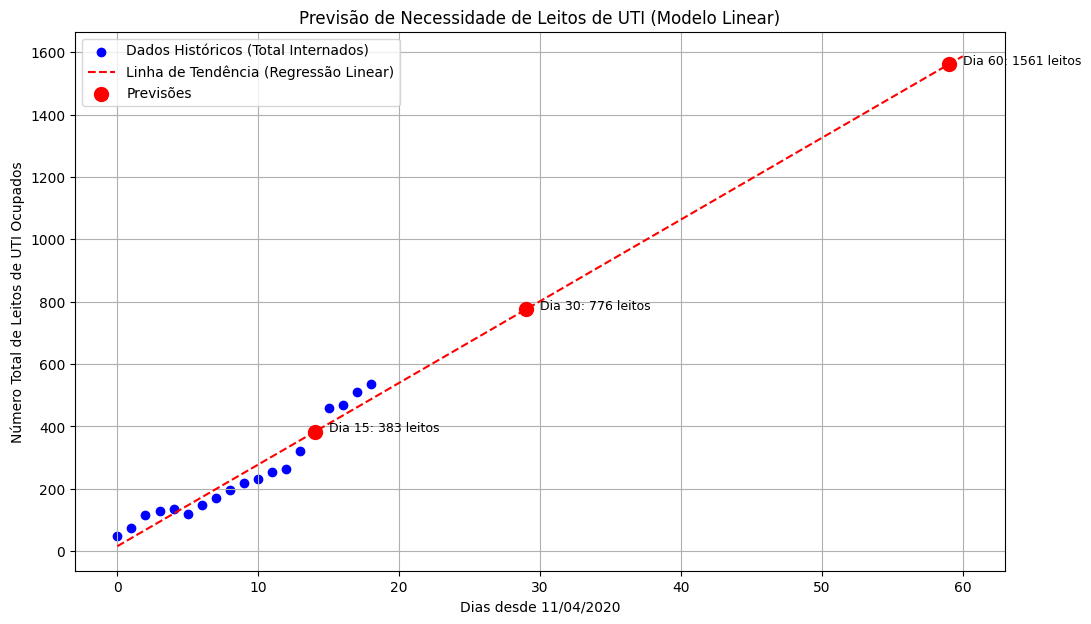

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 1. Criar o DataFrame com os dados da Tabela 4.5 (fonte: 1748)
data = {
    "Data": [
        "11/04/2020", "12/04/2020", "13/04/2020", "14/04/2020", "15/04/2020",
        "16/04/2020", "17/04/2020", "18/04/2020", "19/04/2020", "20/04/2020",
        "21/04/2020", "22/04/2020", "23/04/2020", "24/04/2020", "25/04/2020",
        "26/04/2020", "27/04/2020", "28/04/2020", "29/04/2020"
    ],
    "Internados A": [
        47, 61, 61, 76, 86, 64, 73, 79, 75, 76, 81, 91, 101, 112, 116, 123, 116, 138, 139
    ],
    "Altas A": [
        3, 3, 5, 1, 6, 11, 0, 0, 21, 5, 3, 1, 11, 5, 15, 8, 19, 18, 20
    ],
    "Óbitos A": [
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    ],
    "Internados B": [
        1, 13, 54, 54, 50, 54, 74, 92, 122, 144, 152, 164, 162, 210, 267, 335, 352, 372, 397
    ],
    "Altas B": [
        0, 0, 1, 1, 1, 22, 7, 28, 13, 23, 28, 20, 27, 20, 27, 35, 51, 42, 54
    ],
    "Óbitos - B": [
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2
    ]
}

df = pd.DataFrame(data)

# 2. Processar os dados
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')
# Calcula o total de leitos ocupados na cidade
df['Total Internados'] = df['Internados A'] + df['Internados B']
# Cria a variável de tempo (dias desde o início)
df['Dia'] = (df['Data'] - df['Data'].min()).dt.days

# 3. Preparar dados para o modelo de regressão
# X deve ser um array 2D
X_hist = df[['Dia']]
y_hist = df['Total Internados']

# 4. Treinar o modelo de Regressão Linear
model = LinearRegression()
model.fit(X_hist, y_hist)

# 5. Fazer previsões para os dias 15, 30 e 60
# (Usamos os índices 14, 29, 59 pois a contagem 'Dia' começa em 0)
dias_para_prever = np.array([[14], [29], [59]]) # Corresponde aos dias 15, 30 e 60
previsoes = model.predict(dias_para_prever)
previsoes_arredondadas = np.ceil(previsoes) # Arredonda para cima, pois não existe "meio leito"

print("--- Previsão de Leitos de UTI Necessários ---")
print(f"(Baseado na tendência linear dos primeiros {len(df)} dias)\n")
print(f"Dia 15 (índice 14): {previsoes_arredondadas[0]:.0f} leitos")
print(f"Dia 30 (índice 29): {previsoes_arredondadas[1]:.0f} leitos")
print(f"Dia 60 (índice 59): {previsoes_arredondadas[2]:.0f} leitos")

# 6. Gerar gráfico para visualização
# Criar pontos para a linha de regressão (histórico + futuro)
X_linha = np.arange(0, 61).reshape(-1, 1) # Dias 0 a 60
y_linha = model.predict(X_linha)

plt.figure(figsize=(12, 7))
# Dados históricos
plt.scatter(df['Dia'], df['Total Internados'], color='blue', label='Dados Históricos (Total Internados)')
# Linha de regressão
plt.plot(X_linha, y_linha, color='red', linestyle='--', label=f'Linha de Tendência (Regressão Linear)')
# Pontos previstos
plt.scatter(dias_para_prever, previsoes_arredondadas, color='red', s=100, zorder=5, label='Previsões')

# Adicionar rótulos para as previsões
for i, dia in enumerate(dias_para_prever.flatten()):
    plt.text(dia + 1, previsoes_arredondadas[i], f"Dia {dia+1}: {previsoes_arredondadas[i]:.0f} leitos", fontsize=9)

plt.title('Previsão de Necessidade de Leitos de UTI (Modelo Linear)')
plt.xlabel('Dias desde 11/04/2020')
plt.ylabel('Número Total de Leitos de UTI Ocupados')
plt.legend()
plt.grid(True)
plt.savefig('previsao_leitos_uti.png')

print("\nGráfico 'previsao_leitos_uti.png' salvo com sucesso.")